In [2]:
from pymatgen.core.structure import Structure
from pymatgen.io.cif import CifParser
import networkx as nx

# Đọc file .cif
structure = Structure.from_file("/Users/sonn/Sonn/Workspace/Projects/IonBatteryQML/notebooks/MaterialsProject/mp-573471_symmetrized.cif")

# Tạo đồ thị (graph) từ cấu trúc với pymatgen
graph = structure.get_neighbor_list(r=3.5)  # cutoff radius

# Hoặc đơn giản với NetworkX:
G = nx.Graph()

# Thêm các nút (mỗi nút là 1 nguyên tử)
for i, site in enumerate(structure):
    G.add_node(i, element=site.specie.symbol, coords=site.coords)

# Thêm cạnh (dựa vào khoảng cách gần nhau)
for i, site_i in enumerate(structure):
    for j, site_j in enumerate(structure):
        if i < j and structure.get_distance(i, j) < 3.5:
            G.add_edge(i, j, distance=structure.get_distance(i, j))

# In thông tin
print("Số nút:", G.number_of_nodes())
print("Số cạnh:", G.number_of_edges())


Số nút: 105
Số cạnh: 622


In [4]:
G.nodes(data=True)

NodeDataView({0: {'element': 'Li'}, 1: {'element': 'Li'}, 2: {'element': 'Li'}, 3: {'element': 'Li'}, 4: {'element': 'Li'}, 5: {'element': 'Li'}, 6: {'element': 'Li'}, 7: {'element': 'Li'}, 8: {'element': 'Li'}, 9: {'element': 'Li'}, 10: {'element': 'Li'}, 11: {'element': 'Li'}, 12: {'element': 'Li'}, 13: {'element': 'Li'}, 14: {'element': 'Li'}, 15: {'element': 'Li'}, 16: {'element': 'Li'}, 17: {'element': 'Li'}, 18: {'element': 'Li'}, 19: {'element': 'Li'}, 20: {'element': 'Li'}, 21: {'element': 'Li'}, 22: {'element': 'Li'}, 23: {'element': 'Li'}, 24: {'element': 'Li'}, 25: {'element': 'Li'}, 26: {'element': 'Li'}, 27: {'element': 'Li'}, 28: {'element': 'Li'}, 29: {'element': 'Li'}, 30: {'element': 'Li'}, 31: {'element': 'Li'}, 32: {'element': 'Li'}, 33: {'element': 'Li'}, 34: {'element': 'Li'}, 35: {'element': 'Li'}, 36: {'element': 'Li'}, 37: {'element': 'Li'}, 38: {'element': 'Li'}, 39: {'element': 'Li'}, 40: {'element': 'Li'}, 41: {'element': 'Li'}, 42: {'element': 'Li'}, 43: {'e

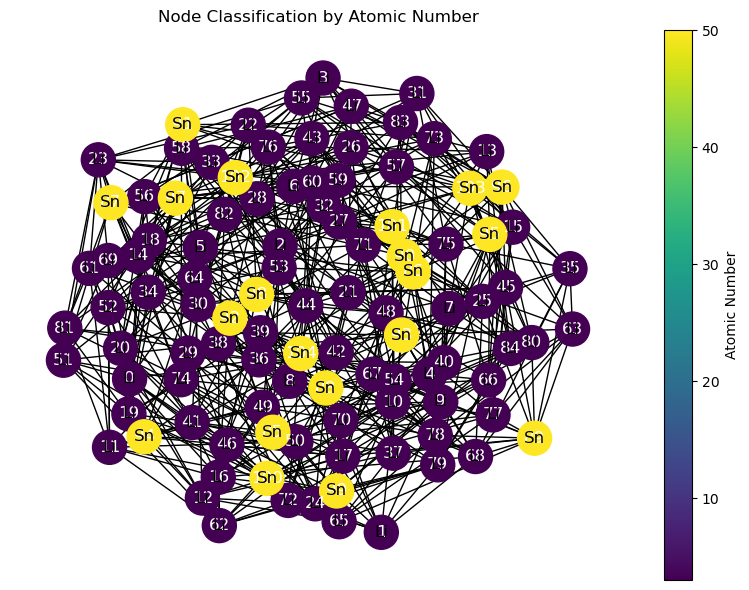

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from pymatgen.core.structure import Structure


G = nx.Graph()
for i, site in enumerate(structure):
    element = site.specie.symbol
    atomic_number = site.specie.Z
    G.add_node(i, element=element, atomic_number=atomic_number)

for i in range(len(structure)):
    for j in range(i + 1, len(structure)):
        if structure.get_distance(i, j) < 3.5:
            G.add_edge(i, j)

# Lấy danh sách màu
node_values = [G.nodes[i]['atomic_number'] for i in G.nodes]
norm = Normalize(vmin=min(node_values), vmax=max(node_values))
cmap = plt.cm.viridis
node_colors = [cmap(norm(z)) for z in node_values]

# Vẽ đồ thị
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=600, font_color='white', ax=ax)
labels = nx.get_node_attributes(G, 'element')
nx.draw_networkx_labels(G, pos, labels=labels, ax=ax)

# Tạo colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Không bắt buộc nhưng tránh cảnh báo
cbar = plt.colorbar(sm, ax=ax, label='Atomic Number')

plt.title("Node Classification by Atomic Number")
plt.tight_layout()
plt.show()


In [7]:
import networkx as nx
import plotly.graph_objects as go
from pymatgen.core.structure import Structure


G = nx.Graph()
for i, site in enumerate(structure):
    G.add_node(i, element=site.specie.symbol, coords=site.coords)

for i in range(len(structure)):
    for j in range(i + 1, len(structure)):
        if structure.get_distance(i, j) < 3.5:
            G.add_edge(i, j)

# Lấy vị trí nguyên tử làm layout (2D flatten)
node_xyz = [structure[i].coords for i in range(len(structure))]
node_x = [coord[0] for coord in node_xyz]
node_y = [coord[1] for coord in node_xyz]
node_z = [coord[2] for coord in node_xyz]
elements = [structure[i].specie.symbol for i in range(len(structure))]

# Tạo scatter3D node
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=6, color='skyblue', opacity=0.8),
    text=elements,
    hoverinfo='text'
)

# Tạo các edge (liên kết)
edge_x = []
edge_y = []
edge_z = []
for i, j in G.edges():
    xi, yi, zi = structure[i].coords
    xj, yj, zj = structure[j].coords
    edge_x += [xi, xj, None]
    edge_y += [yi, yj, None]
    edge_z += [zi, zj, None]

edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(width=2, color='gray'),
    hoverinfo='none'
)

# Tạo figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title='Interactive CIF Graph (3D)',
    showlegend=False,
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    margin=dict(l=0, r=0, b=0, t=30),
)
fig.show()
